In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('mnist_train.csv')
df.shape

(60000, 785)

In [4]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [7]:
X = data[:,1:]
Y = data[:,0]

print(X.shape, Y.shape)

(60000, 784) (60000,)


In [8]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def KNN(X, Y, query_point, k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(query_point, X[i])
        vals.append((d, Y[i]))
    
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts = True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

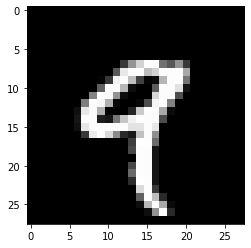

9


In [9]:
def DrawImage(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()
    
DrawImage(X[4])
print(Y[4])

In [10]:
testd = pd.read_csv('mnist_test.csv')
x_test = testd.values[:,1:]
y_test = testd.values[:,0]

In [11]:
pred = KNN(X, Y, x_test[90])

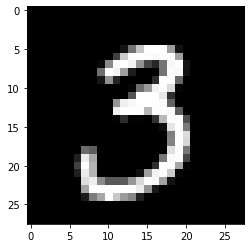

3


In [12]:
DrawImage(x_test[90])
print(y_test[90])

In [13]:
print("Prediction is:", pred)

Prediction is: 3.0


In [14]:
x_test.shape

(10000, 784)

In [16]:
correct = 0
for i in range(x_test.shape[0]):
    pred = KNN(X, Y, x_test[i])
    if int(pred) == y_test[i]:
        correct += 1
        print(correct)

1
2
3


KeyboardInterrupt: 